<a href="https://colab.research.google.com/github/tranhuudan-02573/MachineLearning/blob/main/Lab_7_20130218_TranHuuDan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:

#code
data = datasets.load_iris()
clf = svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf, data.data, data.target, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.00526425838470459
0.0013979673385620117
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel

In [5]:
#code
data = datasets.load_iris()
clf_randomforest=RandomForestClassifier(n_estimators=100)
clf_randomforest.fit(data.data ,data.target)
#importances
importances = clf_randomforest.feature_importances_
#sort
sorted_idx = np.argsort(importances)[::-1]
#print rank
for idx in sorted_idx:
   print(f"{importances[idx]}")

0.45392733212186503
0.4230522658898972
0.09631819116660106
0.026702210821636763


In [6]:

data = datasets.load_iris()
sfm = SelectFromModel(clf_randomforest, threshold=0.1)
X = sfm.fit_transform(data.data, data.target)
     

In [7]:

cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf_randomforest=RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf_randomforest, X, data.target, scoring='accuracy', cv=cv)
print(scores.mean())



0.9400000000000001


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [8]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn import datasets
     

In [9]:
# code
mnist = datasets.load_digits()
     

In [10]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
scores = cross_val_score(kmeans, mnist.data, mnist.target, cv=5, scoring='accuracy')
print("K-means clustering accuracy:", scores.mean())

# Compute precision, recall, and f1 scores
precision = precision_score(mnist.target, clusters, average='weighted', zero_division=1)
recall = recall_score(mnist.target, clusters, average='weighted')
f1 = f1_score(mnist.target, clusters, average='weighted')

print("K-means clustering precision:", precision)
print("K-means clustering recall:", recall)
print("K-means clustering f1-score:", f1)

K-means clustering accuracy: 0.07512999071494894
K-means clustering precision: 0.013558735694097473
K-means clustering recall: 0.015581524763494713
K-means clustering f1-score: 0.014297035101996054


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [13]:
X = mnist.data
y = mnist.target
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split 7-3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
   

In [14]:
# code
#randomforest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_preds = knn_clf.predict(X_test)
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_preds = nb_clf.predict(X_test)

In [11]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [12]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
#  print(mask)
 labels[mask] = mode(mnist.target[mask])[0]
#  print(labels[mask])
accuracy_score(mnist.target, labels)
     

<ipython-input-12-2acdd8ef3870>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


0.7935447968836951

In [15]:
from sklearn.metrics import make_scorer
# Define a function to evaluate the models
def evaluate_model(clf, X, y):
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    scorer = make_scorer(precision_score, average='macro', zero_division=1)
    precision = cross_val_score(clf, X, y, cv=5, scoring=scorer)
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
    return accuracy.mean(), precision.mean(), recall.mean(), f1.mean()

# Evaluate K-Means
kmeans_accuracy, kmeans_precision, kmeans_recall, kmeans_f1 = evaluate_model(kmeans, X_train, y_train)

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_clf, X_train, y_train)

# Evaluate kNN
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(knn_clf, X_train, y_train)

# Evaluate Naïve Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(nb_clf, X_train, y_train)
# Print the results
print("K-Means Accuracy: {:.2f}".format(kmeans_accuracy))
print("K-Means Precision: {:.2f}".format(kmeans_precision))
print("K-Means Recall: {:.2f}".format(kmeans_recall))
print("K-Means F1 Score: {:.2f}".format(kmeans_f1))

print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
print("Random Forest Precision: {:.2f}".format(rf_precision))
print("Random Forest Recall: {:.2f}".format(rf_recall))
print("Random Forest F1 Score: {:.2f}".format(rf_f1))

print("k-Nearest Neighbors Accuracy: {:.2f}".format(knn_accuracy))
print("k-Nearest Neighbors Precision: {:.2f}".format(knn_precision))
print("k-Nearest Neighbors Recall: {:.2f}".format(knn_recall))
print("k-Nearest Neighbors F1 Score: {:.2f}".format(knn_f1))

print("Naïve Bayes Accuracy: {:.2f}".format(nb_accuracy))
print("Naïve Bayes Precision: {:.2f}".format(nb_precision))
print("Naïve Bayes Recall: {:.2f}".format(nb_recall))
print("Naïve Bayes F1 Score: {:.2f}".format(nb_f1))

K-Means Accuracy: 0.06
K-Means Precision: 0.23
K-Means Recall: 0.05
K-Means F1 Score: 0.04
Random Forest Accuracy: 0.97
Random Forest Precision: 0.97
Random Forest Recall: 0.97
Random Forest F1 Score: 0.97
k-Nearest Neighbors Accuracy: 0.97
k-Nearest Neighbors Precision: 0.97
k-Nearest Neighbors Recall: 0.97
k-Nearest Neighbors F1 Score: 0.97
Naïve Bayes Accuracy: 0.77
Naïve Bayes Precision: 0.84
Naïve Bayes Recall: 0.77
Naïve Bayes F1 Score: 0.77


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [16]:
mnist = datasets.load_digits()
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, memory=None,connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None,compute_distances=False)
cluster.fit_predict(mnist.data)
# get clustering labels
cluster.labels_

array([7, 9, 4, ..., 4, 1, 4])

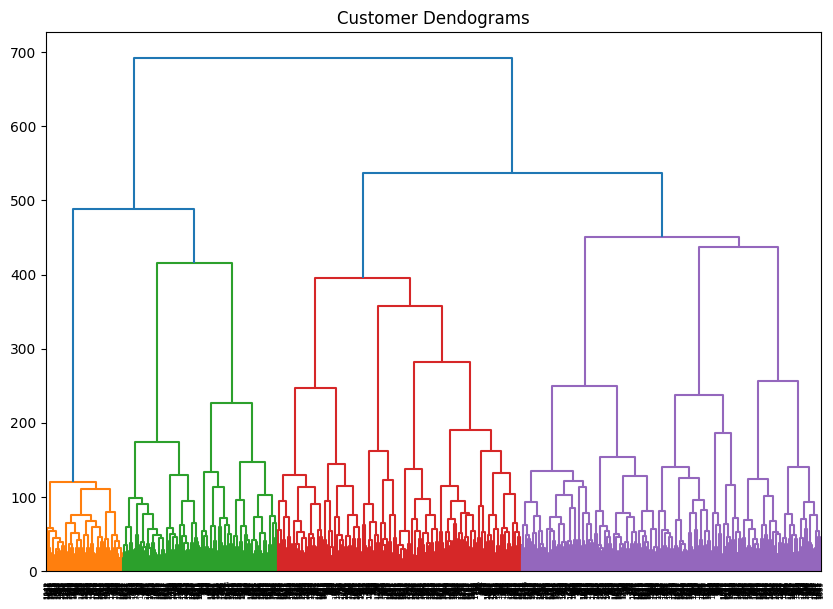

In [17]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(mnist.data, method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [22]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab7'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/lab7


In [23]:
dataSet = pd.read_csv("shopping-data.csv")
print(dataSet.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [24]:
dataSet = dataSet.drop('CustomerID', axis=1)
dataSet = dataSet.drop('Genre', axis=1)
print(dataSet.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [25]:

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state = 0)
kmeans.fit(dataSet)
clusters = kmeans.predict(dataSet)
kmeans.cluster_centers_.shape

(8, 3)

In [26]:

import matplotlib.pyplot as plt

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

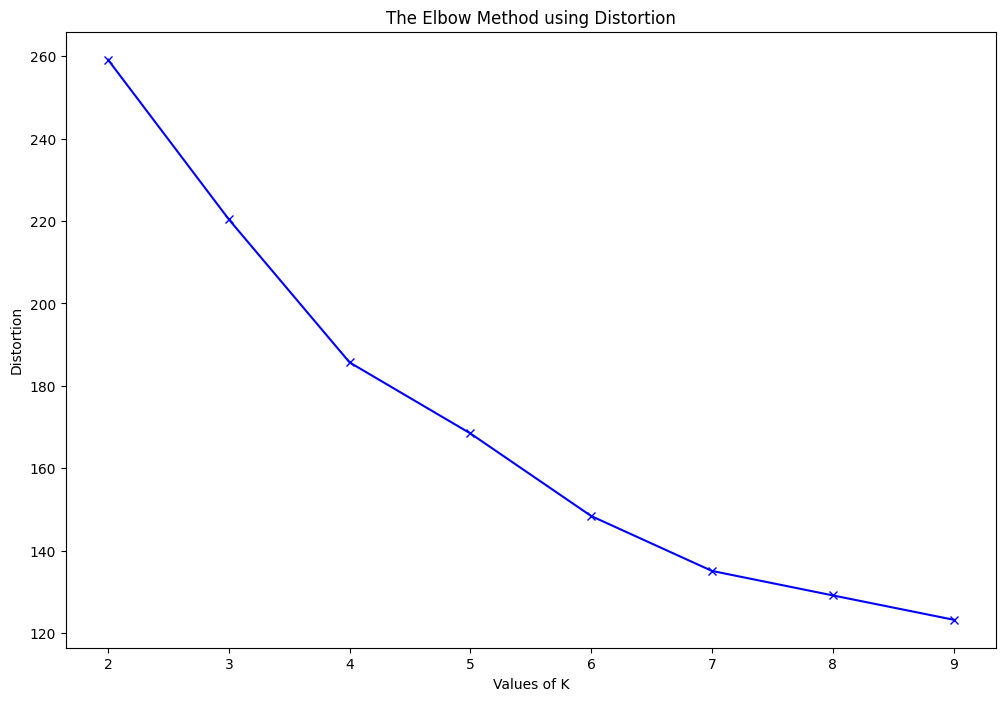

In [27]:
#code
from scipy.spatial.distance import cdist
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataSet)
#code
sse = []
for k in range(2, 10):
 kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 kmeans.fit(scaled_features)
 # 2.1. Khoảng cách tới toàn bộ centroids
 d2centroids = cdist(scaled_features, kmeans.cluster_centers_, 'euclidean') # shape (n, k)
 # 2.2. Khoảng cách tới centroid gần nhất
 min_distance = np.min(d2centroids, axis=1) # shape (n)
 loss = np.sum(min_distance)
 sse.append(loss)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 10), sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [28]:

#code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, memory=None,connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None,compute_distances=False)
cluster.fit_predict(scaled_features)
# get clustering labels
cluster.labels_


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

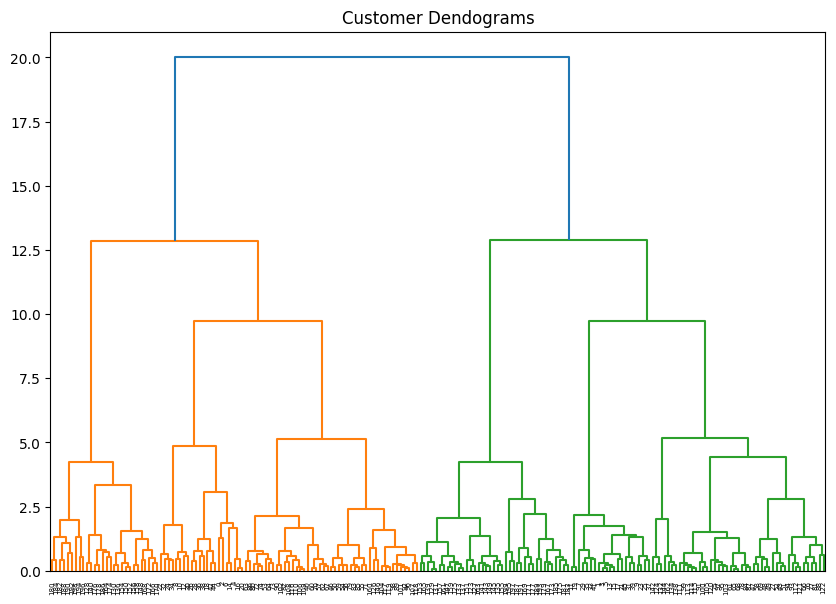

In [29]:

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))
    

#Finally,
Save a copy in your Github. Remember renaming the notebook.